In [51]:
import pandas as pd
import numpy as np

In [52]:
col_names = ['age','workclass','fnlwgt','education','eduaction-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']

In [53]:
df = pd.read_csv("adult.csv",names=col_names,sep=",")
df.head()

,age,workclass,fnlwgt,education,eduaction-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
1,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
2,25,Private,255004,10th,6,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,60,?,24215,10th,6,Divorced,?,Not-in-family,Amer-Indian-Eskimo,Female,0,0,10,United-States,<=50K
4,59,Local-gov,171328,10th,6,Widowed,Other-service,Unmarried,Black,Female,0,0,30,United-States,<=50K


In [54]:
df.replace(' ?', pd.NA, inplace=True)


In [55]:
df.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
eduaction-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [58]:
df.shape

(32561, 15)

In [59]:
df["workclass"].fillna(df["workclass"].mode()[0],inplace=True)
df["occupation"].fillna(df["occupation"].mode()[0],inplace=True)
df["native-country"].fillna(df["native-country"].mode()[0],inplace=True)

In [60]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
eduaction-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 2 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   eduaction-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Detecting and removing Outliers**

In [61]:
df.shape

(32561, 15)

In [62]:
def outliers_remover(data, threshold=5):
    numeric_data = data.select_dtypes(include=['int64', 'float64'])
    zscore = ((numeric_data - numeric_data.mean()) / numeric_data.std())
    out = zscore.abs() > 5
    data = data[~out.any(axis=1)]
    return data

# Apply the function to your DataFrame
df = outliers_remover(df)

In [63]:
df.shape

(32104, 15)

**Data Visualization**
1. Histogram

Objective: To visualize the distribution of a single continuous variable, such as age, education-num, capital-gain, or capital-loss. Histograms help us understand the underlying frequency distribution of the data and identify any patterns or outliers

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

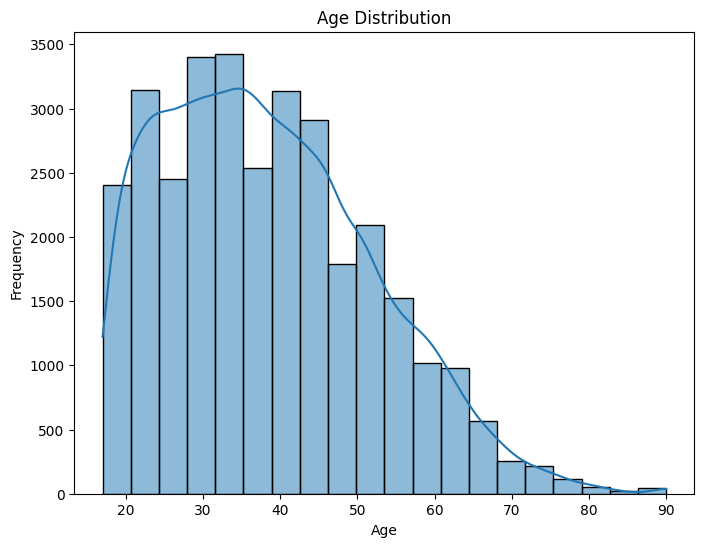

In [65]:
plt.figure(figsize=(8,6))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

2. Dot Plot

Objective: Dot plots can be used to compare the values of a continuous variable across different categories. For example, you could create a dot plot showing the distribution of ages within different education levels or work classes. Dot plots help in visualizing the spread and central tendency of the data within each category.

<ipython-input-66-fe42233a6550>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='workclass',y='age', data=df, jitter=True, palette='viridis')


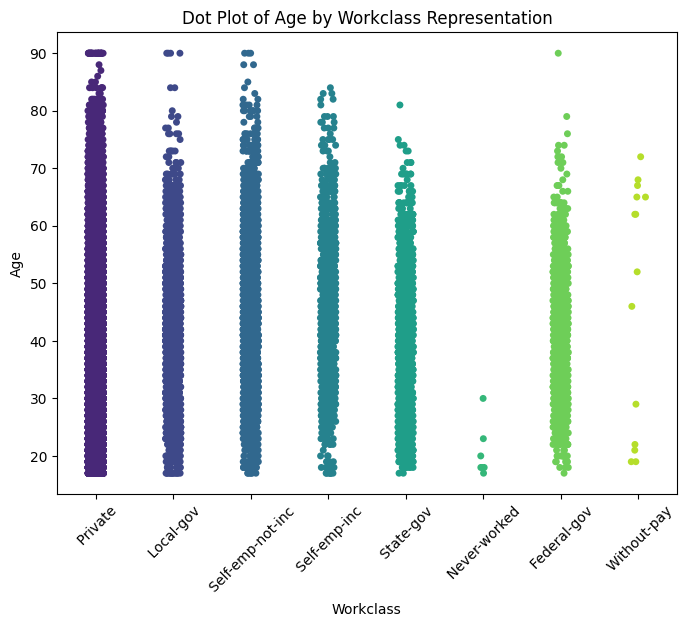

In [66]:
plt.figure(figsize=(8,6))
sns.stripplot(x='workclass',y='age', data=df, jitter=True, palette='viridis')
plt.title('Dot Plot of Age by Workclass Representation')
plt.xlabel('Workclass')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()

3. Bar Plots

Objective: Bar plots are useful for comparing the frequency or distribution of a categorical variable across different categories. You could create bar plots to show the number of individuals in each income category for different native countries or races. Bar plots help in visualizing the distribution of categorical data and identifying any patterns or discrepancies.

In [67]:
temp = df[df["income"] == '>50K']

country_vs_age = df[["native-country","income","age"]].groupby(["native-country","income"]).mean()

In [68]:

country_vs_age

age
native-country income           
 Cambodia       <=50K  35.666667
                >50K   41.428571
 Canada         <=50K  40.875000
                >50K   45.973684
 China          <=50K  41.800000
...                          ...
 United-States  >50K   44.148554
 Vietnam        <=50K  33.311475
                >50K   35.400000
 Yugoslavia     <=50K  38.000000
                >50K   40.166667

[79 rows x 1 columns]

<ipython-input-69-b335c9a29aeb>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "age", y = "native-country", data = country_vs_age, palette = "viridis")


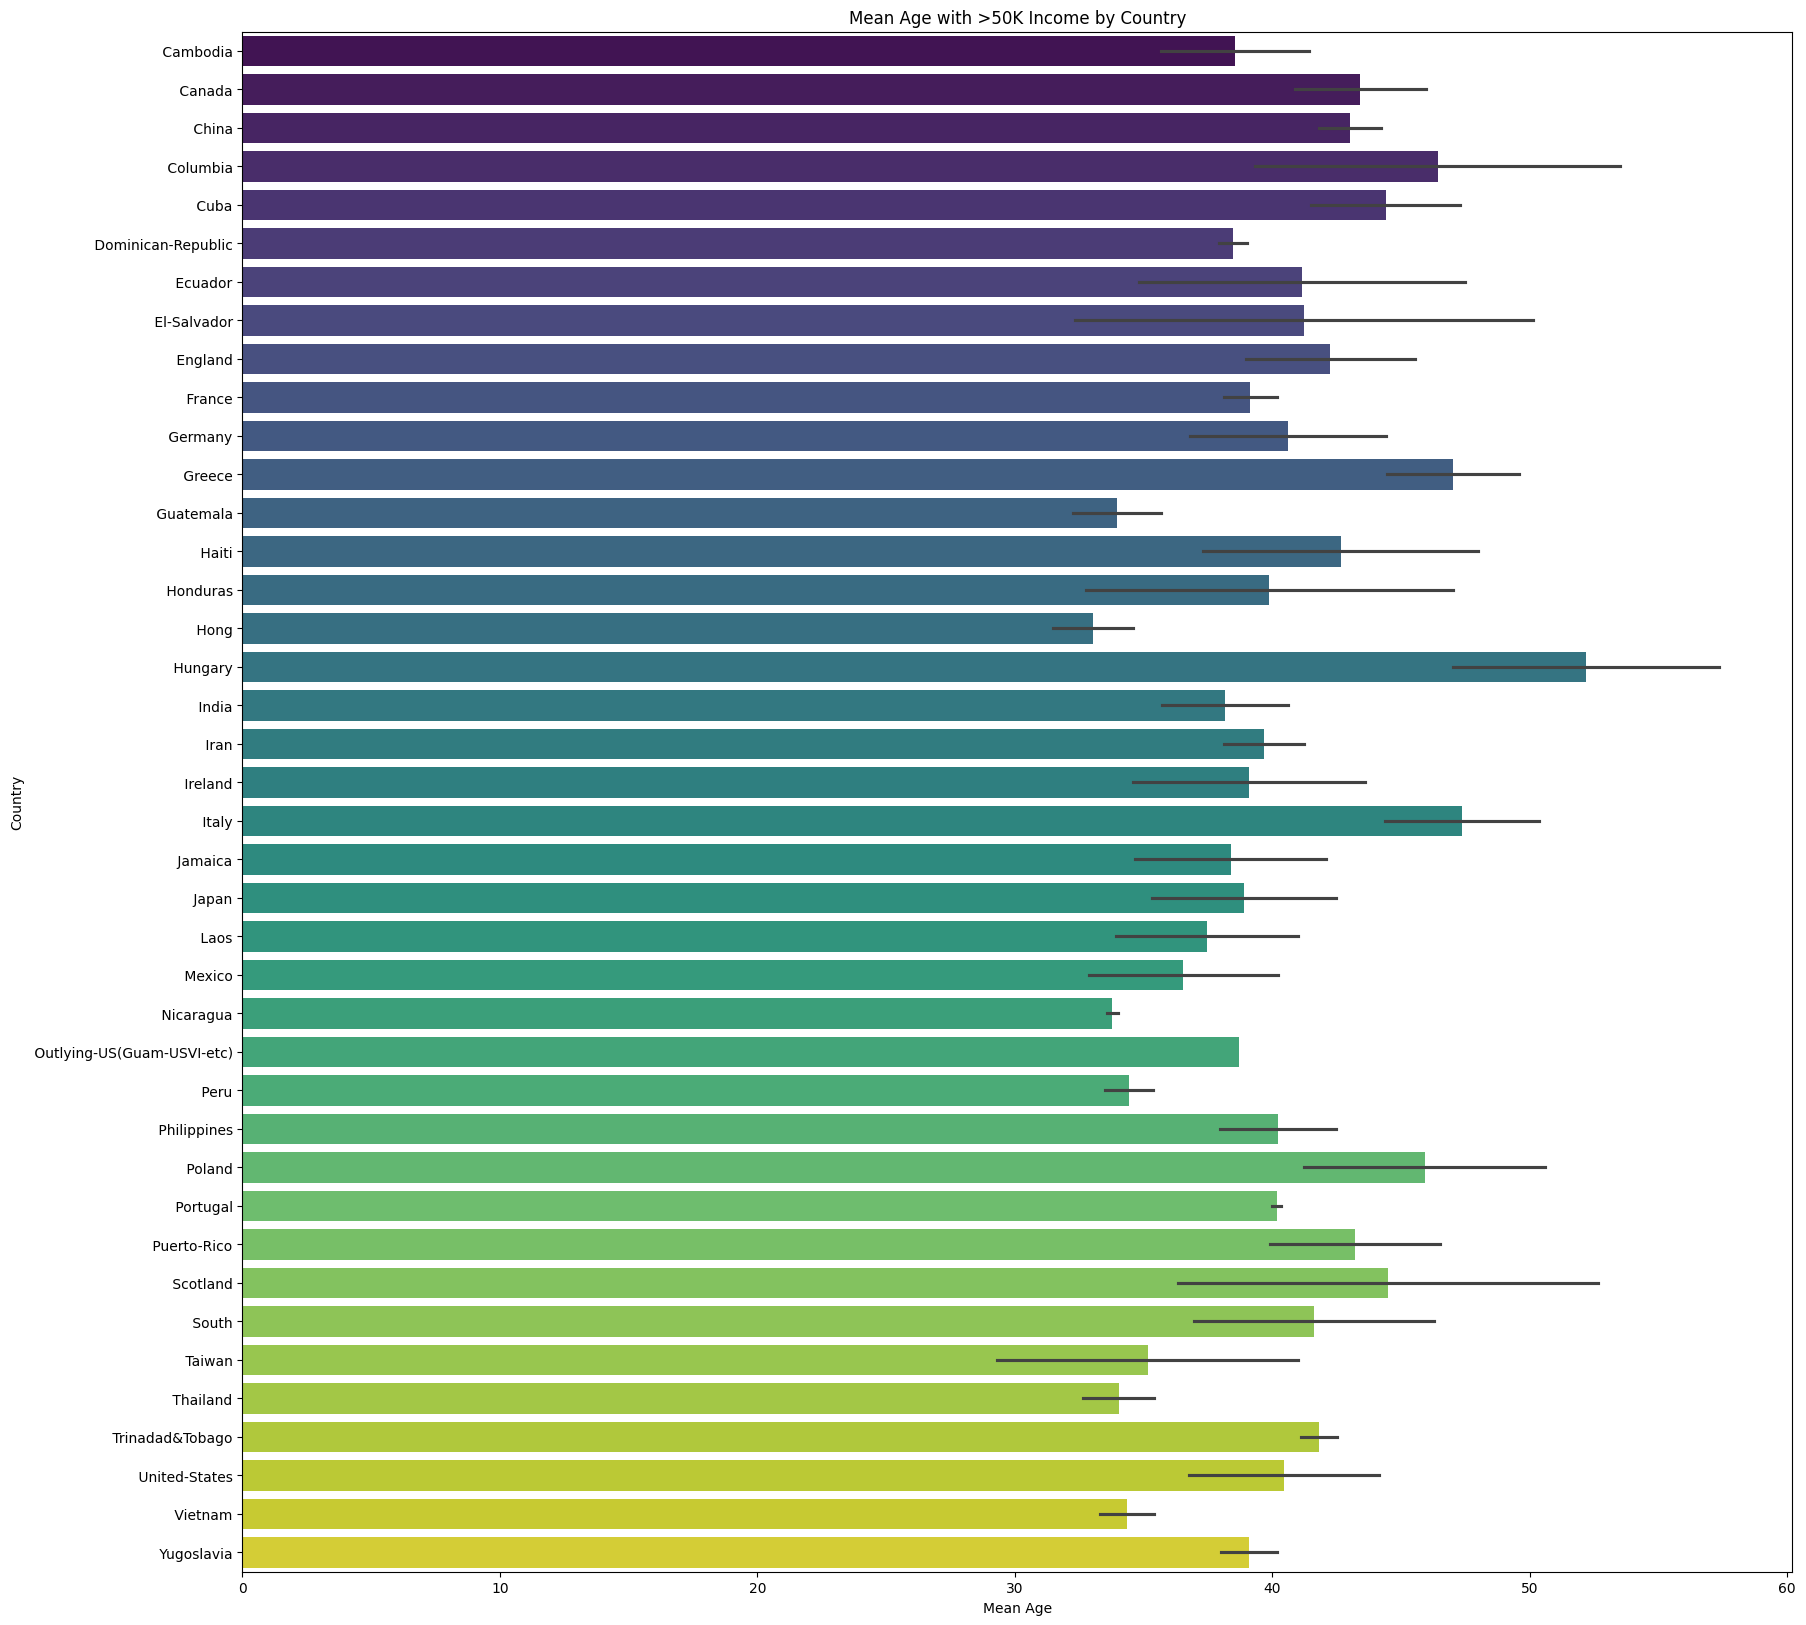

In [69]:
plt.figure(figsize = (20,20))
sns.barplot(x = "age", y = "native-country", data = country_vs_age, palette = "viridis")
plt.xlabel("Mean Age")
plt.ylabel("Country")
plt.title("Mean Age with >50K Income by Country")
plt.show()

4. Line Charts

Objective: Line charts are typically used to visualize trends over time. However, in this dataset, since we don't have a time-related variable, we can use line charts to show the relationship between two continuous variables, such as age and hours-per-week. Line charts help in understanding the relationship or correlation between two continuous variables.

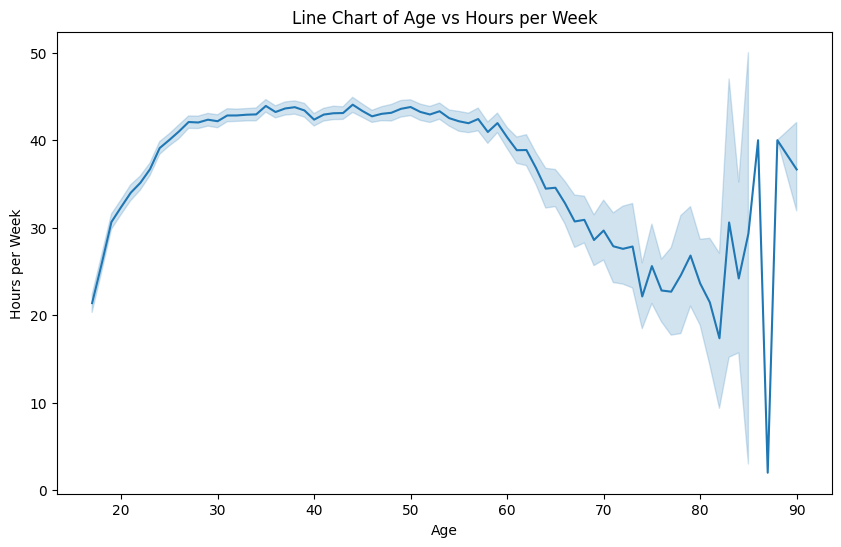

In [71]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='hours-per-week', data=df)
plt.title('Line Chart of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.show()

5. Add Histogram and Scatter plot to box plot.

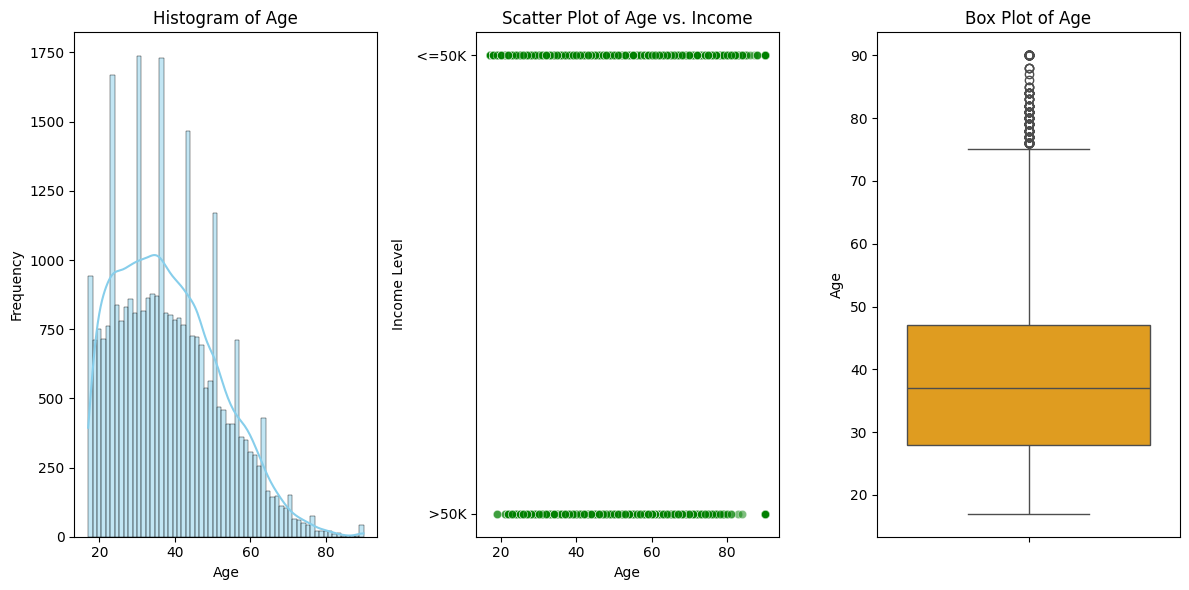

In [72]:
plt.figure(figsize=(12, 6))

# Add a histogram
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Add a scatter plot
plt.subplot(1, 3, 2)
sns.scatterplot(x='age', y='income', data=df, color='green', alpha=0.5)
plt.title('Scatter Plot of Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income Level')

# Add a box plot
plt.subplot(1, 3, 3)
sns.boxplot(y='age', data=df, color='orange')
plt.title('Box Plot of Age')
plt.ylabel('Age')

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()

6. Pie Chart

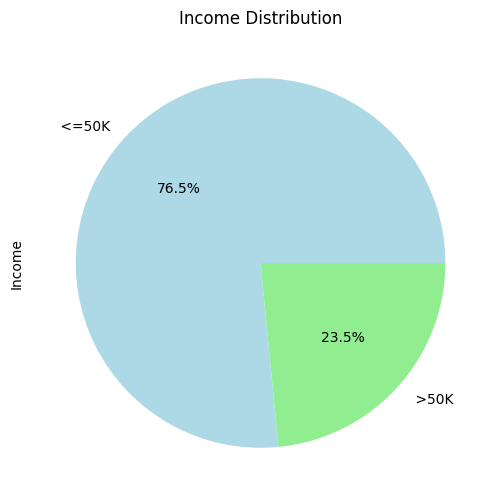

In [74]:
plt.figure(figsize=(8,6))
df['income'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightblue','lightgreen'])
plt.title("Income Distribution")
plt.ylabel("Income")
plt.show()

7. Box Plot

<ipython-input-75-a587472d72a8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='income', y='age', data=df, palette='Set2')


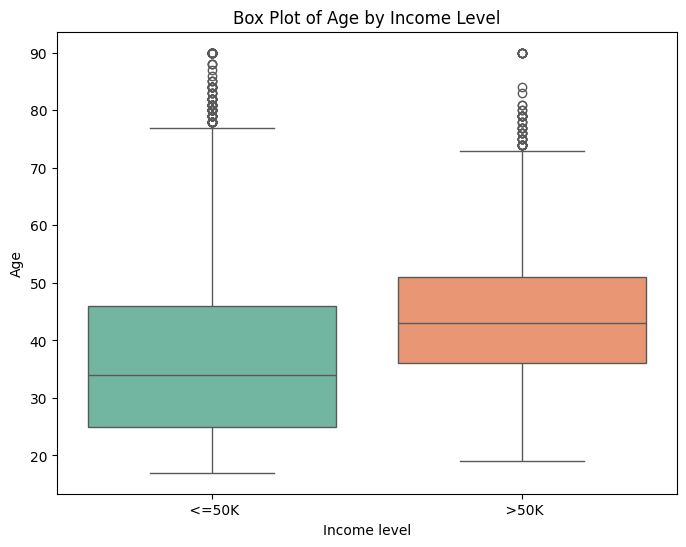

In [75]:
plt.figure(figsize=(8,6))
sns.boxplot(x='income', y='age', data=df, palette='Set2')
plt.title("Box Plot of Age by Income Level")
plt.xlabel("Income level")
plt.ylabel("Age")
plt.show()

8. Scatter Plot

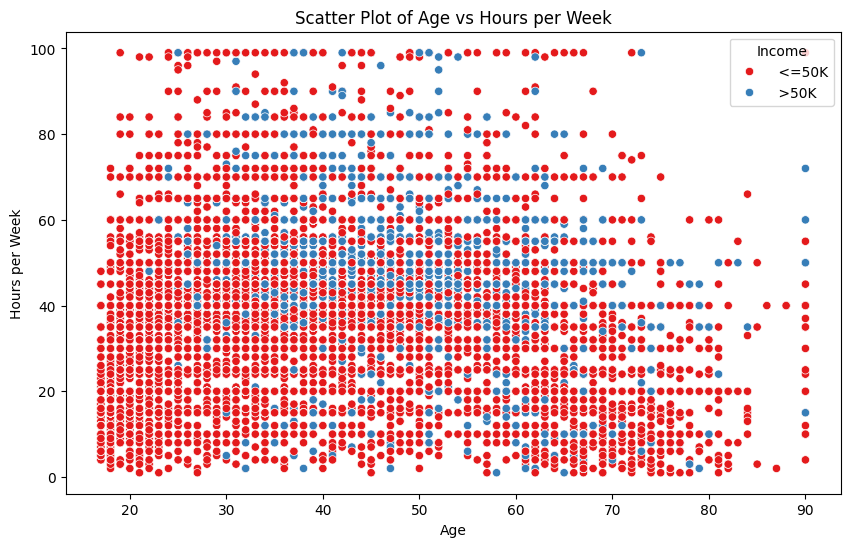

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', palette='Set1')
plt.title('Scatter Plot of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.show()

9. Add BoxPlot to Scatter Plot


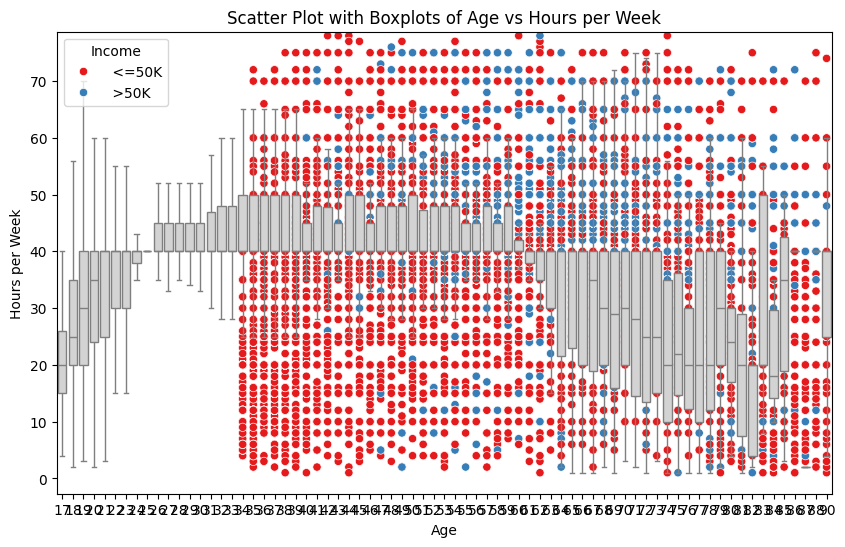

In [77]:
# Add Boxplots to Scatterplot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='hours-per-week', data=df, hue='income', palette='Set1')
sns.boxplot(x='age', y='hours-per-week', data=df, color='lightgray', showfliers=False)
plt.title('Scatter Plot with Boxplots of Age vs Hours per Week')
plt.xlabel('Age')
plt.ylabel('Hours per Week')
plt.legend(title='Income')
plt.show()
